* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1 Visualization for correlation](#21)
    * [2.2 Visualization for MSSubClass](#22)
    * [2.3 Visualization for MSZoning](#23)
    * [2.4 Visualization for Neighborhood](#24)
    * [2.5 Visualization for OverallQual](#25)
    * [2.6 Visualization for OverallCond](#26)
* [3.Regression_tree](#3.Regression_tree)
    

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math


In [2]:
os.listdir("../input/house-prices-advanced-regression-techniques")

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']

# 1.DataOverview

This data size is 1460,and the variable have 81 types,including ID,MSSubClass,and so on.

In this kernel,I focus on the MSSubClass,MSZonong,Neighborhood,OverallQual,and OverallCond.
    

In [3]:
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


From the bar chart,we can know taht the number of missing value in each variable.If you wanna use 

these variables to create Regression Model,you have to watch out them.

Text(0.5, 0, 'counts')

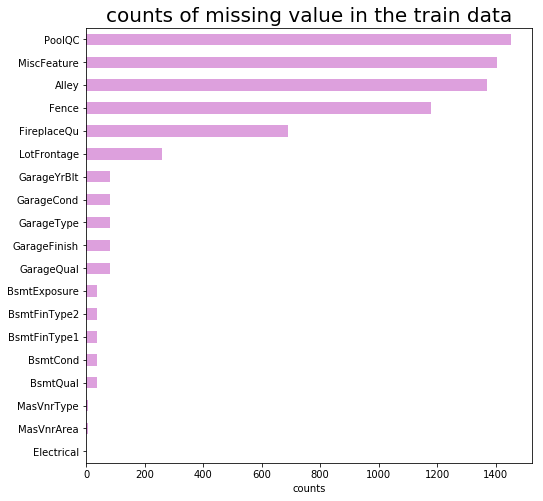

In [4]:
plt.figure(figsize=(8,8))
train.isnull().sum().sort_values(ascending=False)[:19].sort_values().plot.barh(color='plum')
plt.title('counts of missing value in the train data',size=20)
plt.xlabel('counts')

# 2.Visualization

<h3 id="21">2.1 Visualization for correlation</h3>

Text(0.5, 1.0, 'correlation plot')

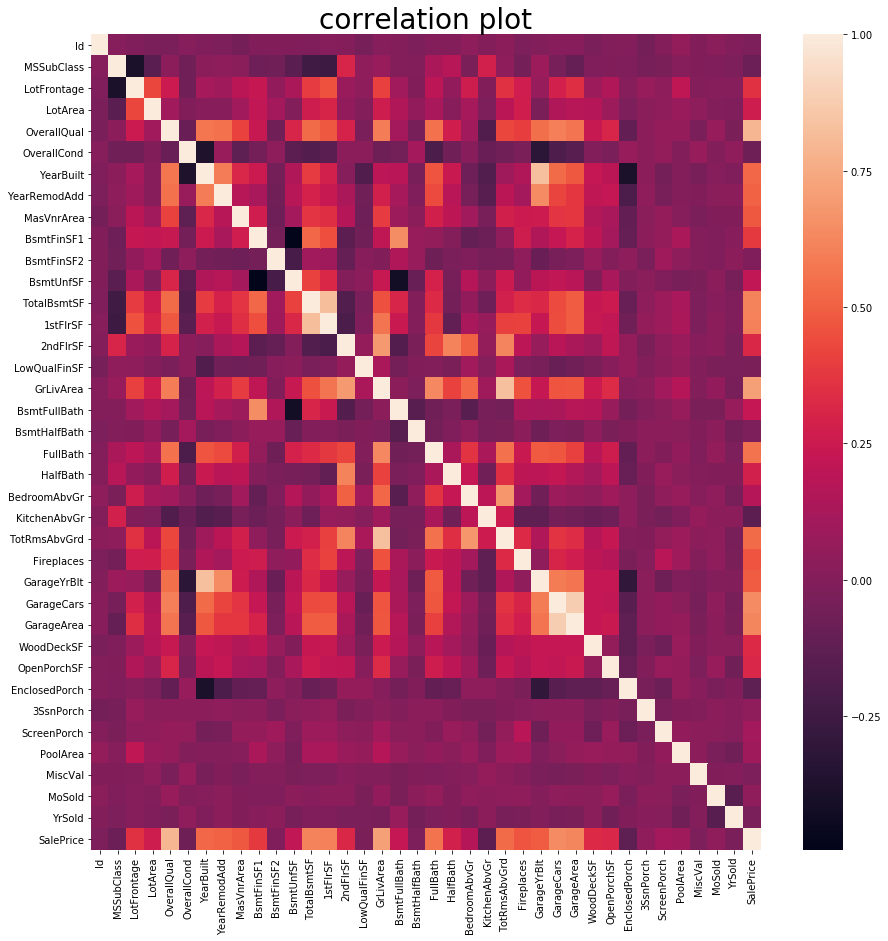

In [5]:
plt.figure(figsize=(15,15))
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
plt.title("correlation plot",size=28)

<h3 id="22">2.2 Visualization for MSSubClass</h3>

Text(0, 0.5, '')

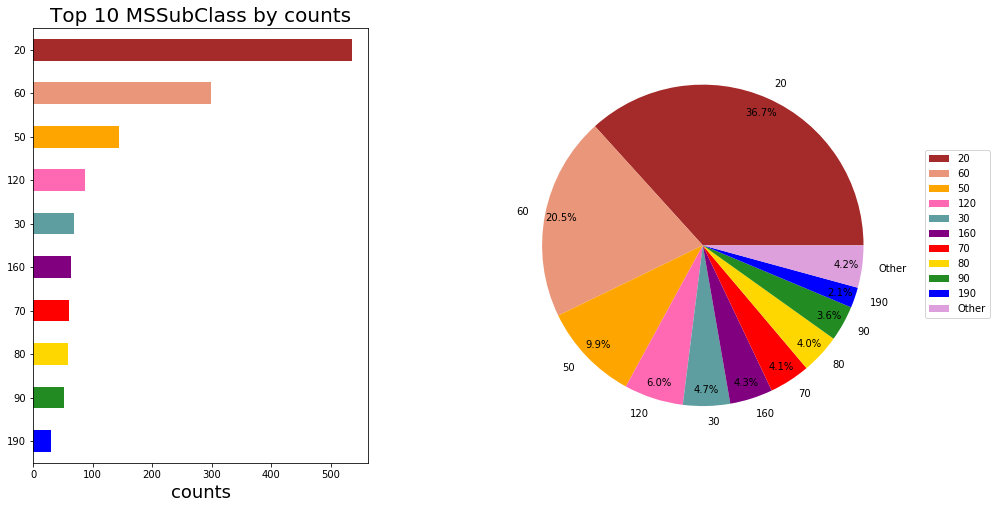

In [6]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
train.MSSubClass.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 MSSubClass by counts",size=20)
ax[0].set_xlabel('counts',size=18)


count=train.MSSubClass.value_counts()
groups=list(train.MSSubClass.value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.8)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ylabel('')

I remove the data which saleprice is greater than 400000 to balance the distribution of price for MSSubClass.

Text(0.5, 1.0, 'Boxplot of Price for MSSubClass(price<=400000)')

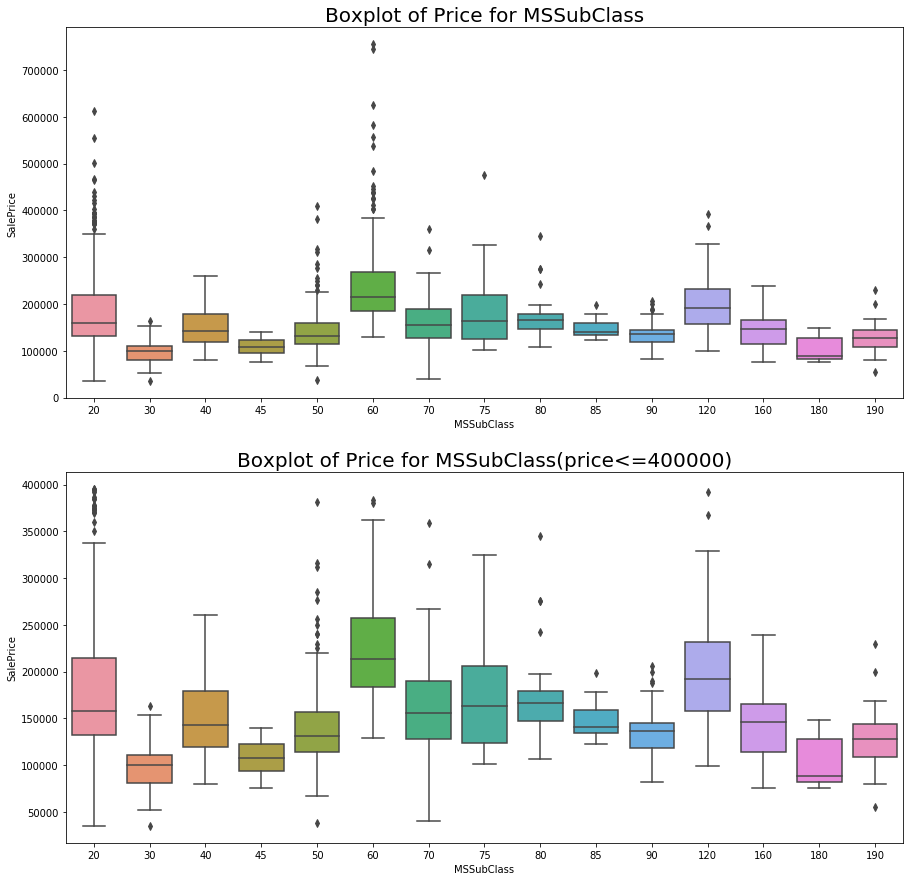

In [7]:
fig,ax=plt.subplots(2,1,figsize=(15,15))
sns.boxplot(x="MSSubClass", y="SalePrice", data=train,ax=ax[0])
ax[0].set_title("Boxplot of Price for MSSubClass",size=20)

train=train[train.SalePrice<=400000]
sns.boxplot(x="MSSubClass", y="SalePrice", data=train,ax=ax[1])
ax[1].set_title("Boxplot of Price for MSSubClass(price<=400000)",size=20)

<h3 id="23">2.3 Visualization for MSZoning</h3>

Text(0.5, 1.0, 'Boxplot of Price for MSZoning')

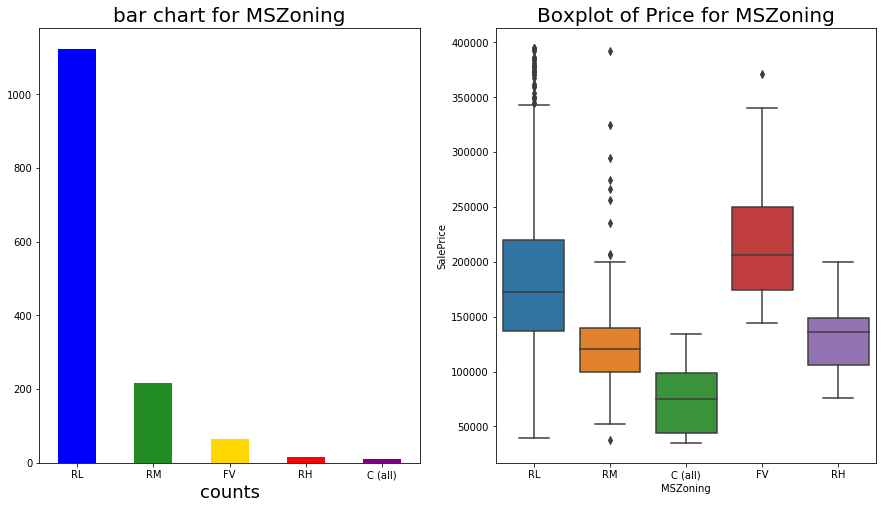

In [8]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
train.MSZoning.value_counts().sort_values(ascending=False).plot(kind='bar',color=clr,ax=ax[0])
ax[0].set_title("bar chart for MSZoning",size=20)
ax[0].set_xlabel('counts',size=18)
ax[0].tick_params(axis='x',rotation=360)

sns.boxplot(x="MSZoning", y="SalePrice", data=train,ax=ax[1])
ax[1].set_title("Boxplot of Price for MSZoning",size=20)

<h3 id="24">2.4 Visualization for Neighborhood</h3>

Text(0, 0.5, '')

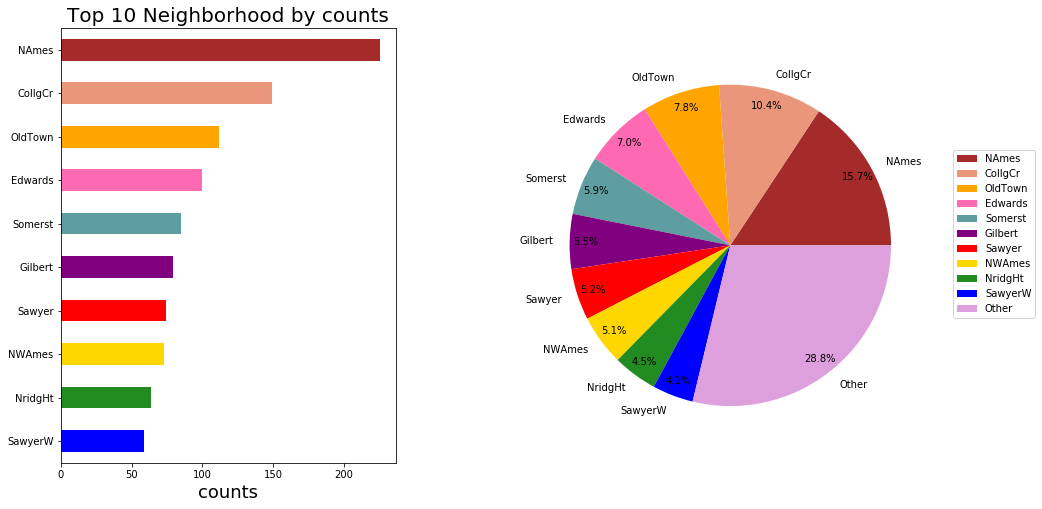

In [9]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
train.Neighborhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Neighborhood by counts",size=20)
ax[0].set_xlabel('counts',size=18)


count=train.Neighborhood.value_counts()
groups=list(train.Neighborhood.value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.8)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ylabel('')

Text(0.5, 1.0, 'Boxplot of Price for Neighborhood')

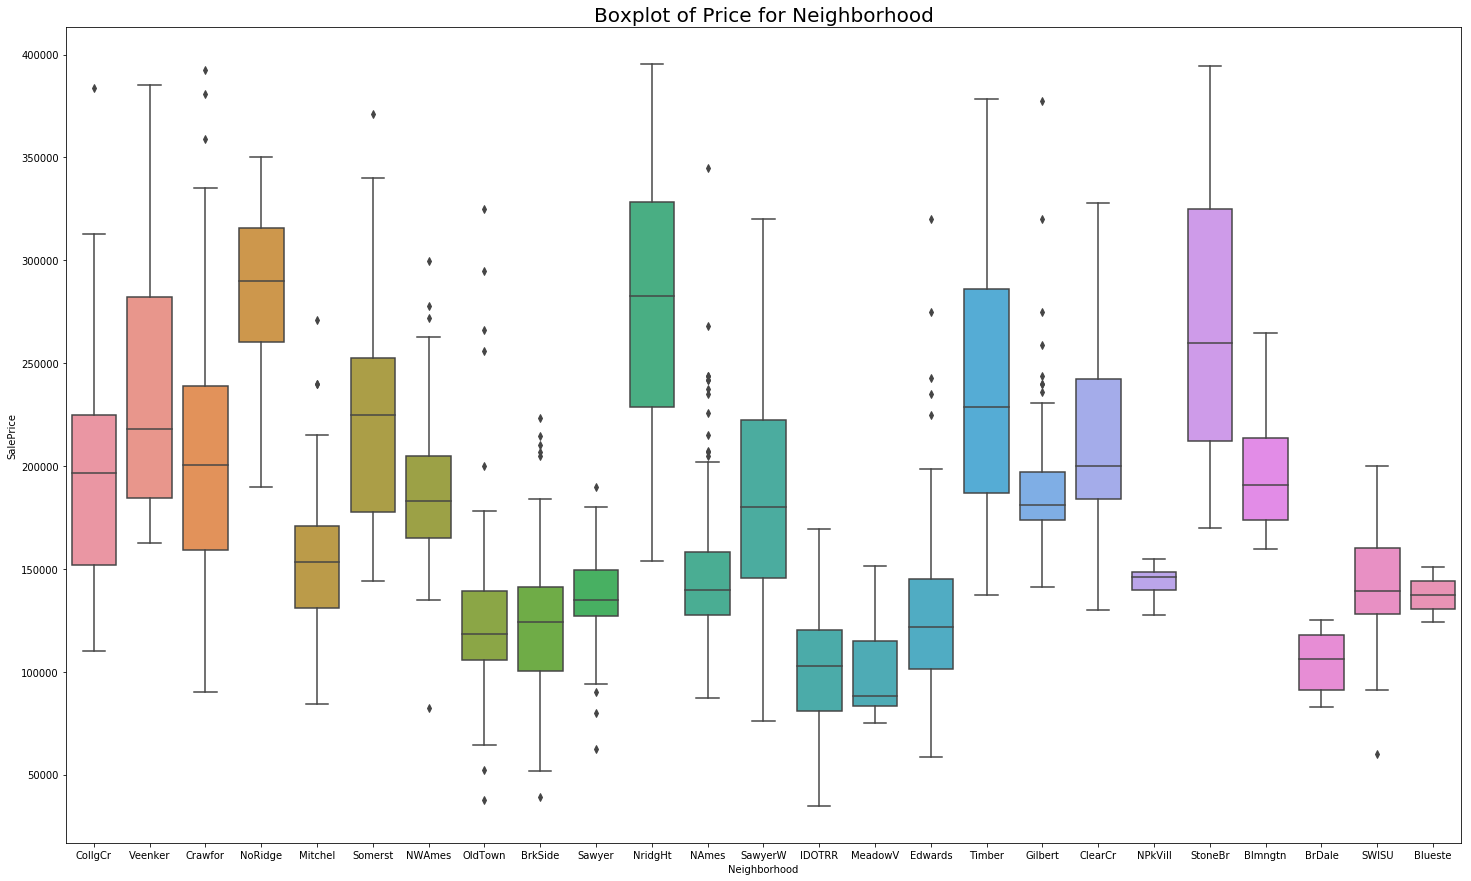

In [10]:
fig,ax=plt.subplots(figsize=(25,15))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train,ax=ax)
ax.set_title("Boxplot of Price for Neighborhood",size=20)

<h3 id="25">2.5 Visualization for OverallQual</h3>

Text(0, 0.5, '')

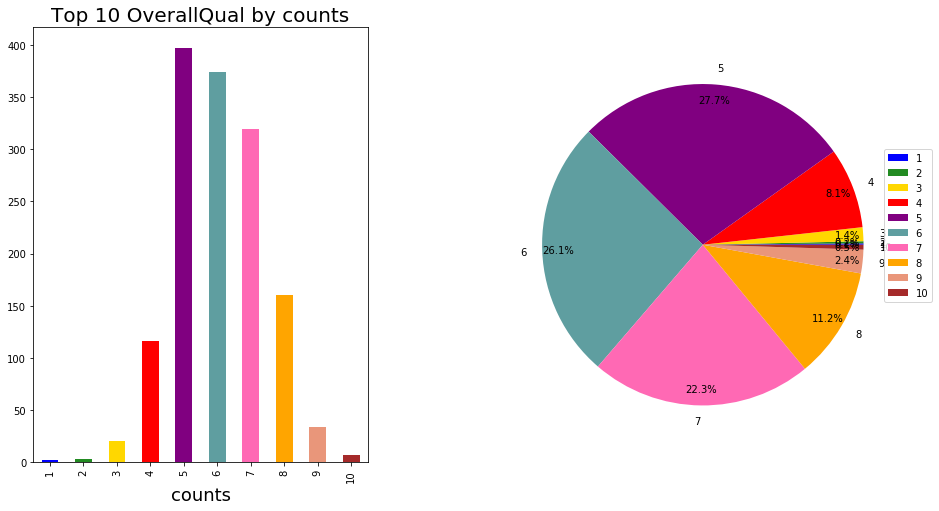

In [11]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
train.groupby(['OverallQual'])['Id'].agg('count').plot(kind='bar',color=clr,ax=ax[0])
ax[0].set_title("Top 10 OverallQual by counts",size=20)
ax[0].set_xlabel('counts',size=18)


count=train.groupby(['OverallQual'])['Id'].agg('count')
groups=list(train.groupby(['OverallQual'])['Id'].agg('count').index)
counts=list(count)
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.20,0.8)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ylabel('')

Text(0.5, 1.0, 'Boxplot of Price for OverallQual')

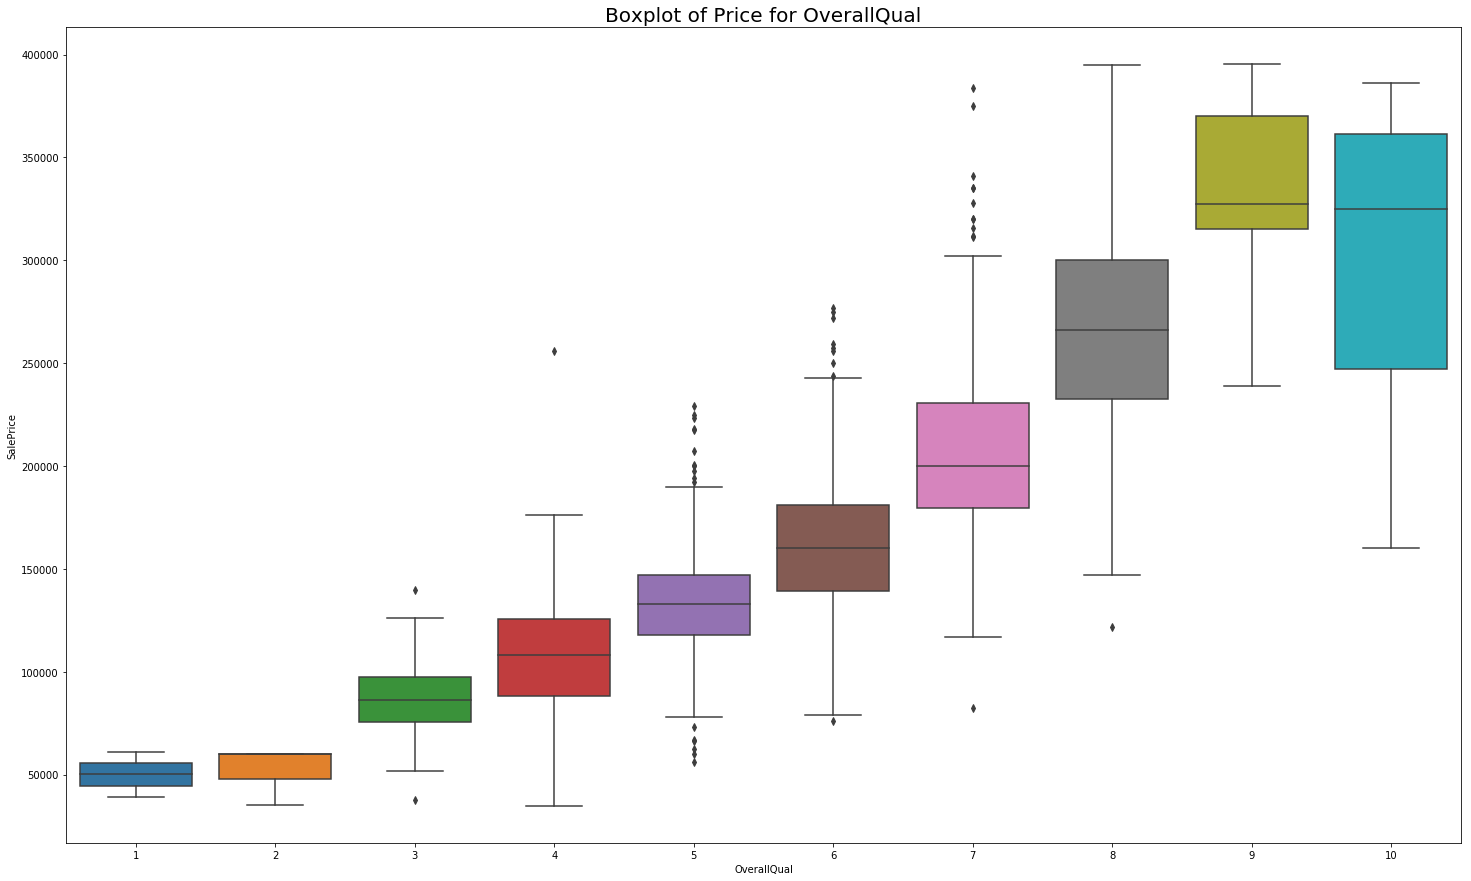

In [12]:
fig,ax=plt.subplots(figsize=(25,15))
sns.boxplot(x="OverallQual", y="SalePrice", data=train,ax=ax)
ax.set_title("Boxplot of Price for OverallQual",size=20)

<h3 id="26">2.6 Visualization for OverallCond</h3>

Text(0, 0.5, '')

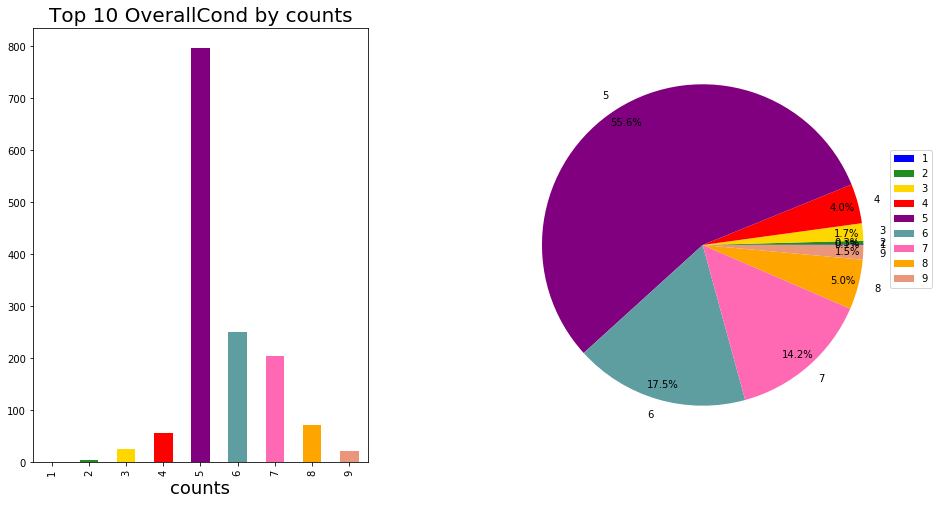

In [13]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
train.groupby(['OverallCond'])['Id'].agg('count').plot(kind='bar',color=clr,ax=ax[0])
ax[0].set_title("Top 10 OverallCond by counts",size=20)
ax[0].set_xlabel('counts',size=18)


count=train.groupby(['OverallCond'])['Id'].agg('count')
groups=list(train.groupby(['OverallCond'])['Id'].agg('count').index)
counts=list(count)
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.20,0.8)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ylabel('')

Text(0.5, 1.0, 'Boxplot of Price for OverallCond')

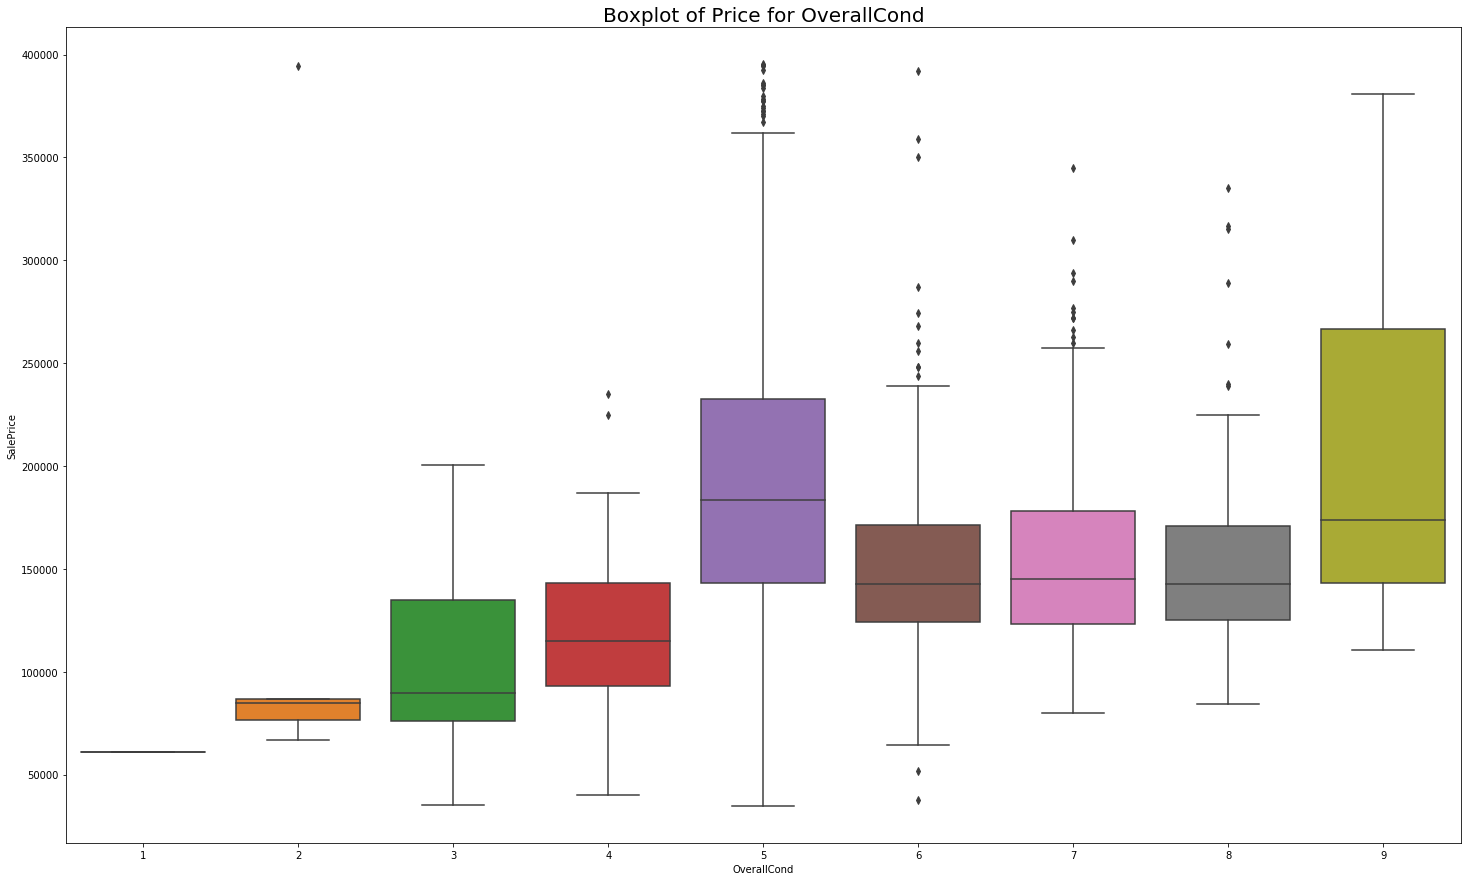

In [14]:
fig,ax=plt.subplots(figsize=(25,15))
sns.boxplot(x="OverallCond", y="SalePrice", data=train,ax=ax)
ax.set_title("Boxplot of Price for OverallCond",size=20)

# 3.Regression_tree

In [15]:
data_tree=train[['MSSubClass','MSZoning','Neighborhood','OverallQual','OverallCond','SalePrice']]
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_tree['MSZoning_new'] = labelencoder.fit_transform(data_tree['MSZoning'])
data_tree['Neighborhood_new'] = labelencoder.fit_transform(data_tree['Neighborhood'])
data_tree.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,SalePrice,MSZoning_new,Neighborhood_new
0,60,RL,CollgCr,7,5,208500,3,5
1,20,RL,Veenker,6,8,181500,3,24
2,60,RL,CollgCr,7,5,223500,3,5
3,70,RL,Crawfor,7,5,140000,3,6
4,60,RL,NoRidge,8,5,250000,3,15


The mean absolute error (MAE) is 0.1447 for the regression tree.which is not bad.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(data_tree[['MSSubClass','MSZoning_new','Neighborhood_new','OverallQual','OverallCond']],data_tree[['SalePrice']],test_size=0.1,random_state=300)
tree=DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)
tree=tree.fit(x_train,y_train)
y=y_test['SalePrice']
predict=tree.predict(x_test)
print(np.mean(abs(np.multiply(np.array(y_test.T-predict),np.array(1/y_test)))))

0.14472259986063252


In [17]:
data_tree_for_test=test[['Id','MSSubClass','MSZoning','Neighborhood','OverallQual','OverallCond']]
data_tree_for_test.isnull().sum()

Id              0
MSSubClass      0
MSZoning        4
Neighborhood    0
OverallQual     0
OverallCond     0
dtype: int64

In [18]:
data_tree_for_test[data_tree_for_test.MSZoning.isnull()==True]

,Id,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond
455,1916,30,NaN,IDOTRR,2,4
756,2217,20,NaN,IDOTRR,1,5
790,2251,70,NaN,IDOTRR,5,1
1444,2905,20,NaN,Mitchel,1,3


In [19]:
data_tree_for_test.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

We replace the NaN in MSZoning with 'RL' because 'RL' is the most count in MSZoning.

In [20]:
data_tree_for_test.MSZoning[[455,756,790,1444]]='RL'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:1288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, sel

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_tree_for_test['MSZoning_new'] = labelencoder.fit_transform(data_tree_for_test['MSZoning'])
data_tree_for_test['Neighborhood_new'] = labelencoder.fit_transform(data_tree_for_test['Neighborhood'])
data_tree_for_test.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Id,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,MSZoning_new,Neighborhood_new
0,1461,20,RH,NAmes,5,6,2,12
1,1462,20,RL,NAmes,6,6,3,12
2,1463,60,RL,Gilbert,5,5,3,8
3,1464,60,RL,Gilbert,6,6,3,8
4,1465,120,RL,StoneBr,8,5,3,22


In [22]:
predict_test=tree.predict(data_tree_for_test[['MSSubClass','MSZoning_new','Neighborhood_new','OverallQual','OverallCond']])
submit=pd.DataFrame({'Id':data_tree_for_test.Id,'SalePrice':predict_test})
submit.head()

,Id,SalePrice
0,1461,137387.218750
1,1462,163440.223214
2,1463,137387.218750
3,1464,163440.223214
4,1465,236131.250000


In [23]:
submit.to_csv('submission.csv',index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 